In [1259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1260]:
data=pd.read_csv("dirty_iris.csv")
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


<h1>Preprocessing the Data</h1>

In [1262]:
#checking for the any null value and removing it
data.isnull().any()
data=data.replace(np.inf,np.nan)

In [1263]:
#checking total null values
data.isnull().sum()

Sepal.Length    10
Sepal.Width     17
Petal.Length    19
Petal.Width     13
Species          0
dtype: int64

In [1264]:
#finding the mean to fill null values
mean = data.iloc[:,:4].mean()
mean

Sepal.Length    6.559286
Sepal.Width     3.390977
Petal.Length    4.449962
Petal.Width     1.207299
dtype: float64

In [1265]:
data=data.replace(np.nan,mean)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.200000,4.500000,1.500000,versicolor
1,6.3,3.300000,6.000000,2.500000,virginica
2,6.2,3.390977,5.400000,2.300000,virginica
3,5.0,3.400000,1.600000,0.400000,setosa
4,5.7,2.600000,3.500000,1.000000,versicolor
...,...,...,...,...,...
145,6.7,3.100000,5.600000,2.400000,virginica
146,5.6,3.000000,4.500000,1.500000,versicolor
147,5.2,3.500000,1.500000,0.200000,setosa
148,6.4,3.100000,4.449962,1.800000,virginica


In [1266]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [1267]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,6.559286,3.390977,4.449962,1.207299
std,6.568758,3.120456,5.388918,0.730600
min,0.000000,-3.000000,0.000000,0.100000
25%,5.100000,2.800000,1.700000,0.400000
50%,5.800000,3.100000,4.449962,1.300000
75%,6.500000,3.390977,5.100000,1.800000
max,73.000000,30.000000,63.000000,2.500000


In [1268]:
data["Species"].value_counts()

Species
versicolor    50
virginica     50
setosa        50
Name: count, dtype: int64

In [1269]:
pd.unique(data["Species"])

array(['versicolor', 'virginica', 'setosa'], dtype=object)

<h1>Finding and removing the Outliers</h1>

<Axes: >

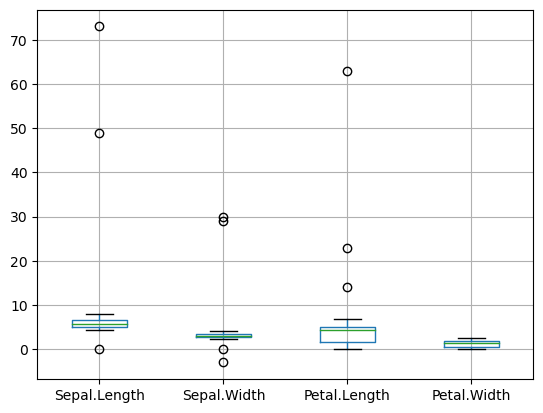

In [1271]:
data.boxplot()

In [1272]:
#outlier identify
q2=data['Sepal.Length'].quantile(0.50)
q3=data['Sepal.Length'].quantile(0.75)
iqr=q3-q2
outlier=data[(data['Sepal.Length']<q2-1.5*iqr) | (data['Sepal.Length']>q3+2.5*iqr)]
print("\n\nOutlier of all columns is : \n\n",outlier)



Outlier of all columns is : 

      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
17            4.7     3.200000      1.300000     0.200000     setosa
25            4.6     3.200000      1.400000     0.200000     setosa
27           73.0    29.000000     63.000000     1.207299  virginica
30            4.4     3.200000      4.449962     0.200000     setosa
42            0.0     3.390977      1.300000     0.400000     setosa
62            4.3     3.000000      1.100000     0.100000     setosa
88            4.4     2.900000      1.400000     0.200000     setosa
109           4.6     3.400000      1.400000     0.300000     setosa
117           4.6     3.100000      1.500000     0.200000     setosa
121           4.5     2.300000      1.300000     0.300000     setosa
124          49.0    30.000000     14.000000     2.000000     setosa
128           4.6     3.600000      4.449962     0.200000     setosa
134           4.4     3.000000      1.300000     1.207299     setosa
1

In [1273]:
#outlier remove
data=data.drop(outlier.index)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.200000,4.500000,1.500000,versicolor
1,6.3,3.300000,6.000000,2.500000,virginica
2,6.2,3.390977,5.400000,2.300000,virginica
3,5.0,3.400000,1.600000,0.400000,setosa
4,5.7,2.600000,3.500000,1.000000,versicolor
...,...,...,...,...,...
145,6.7,3.100000,5.600000,2.400000,virginica
146,5.6,3.000000,4.500000,1.500000,versicolor
147,5.2,3.500000,1.500000,0.200000,setosa
148,6.4,3.100000,4.449962,1.800000,virginica


In [1274]:
#outlier identify
q1=data['Sepal.Width'].quantile(0.25)
q3=data['Sepal.Width'].quantile(0.75)
iqr=q3-q1
outlier=data[(data['Sepal.Width']<q1-1.5*iqr) | (data['Sepal.Width']>q3+.5*iqr)]
print("\n\nOutlier of all columns is : \n\n",outlier)



Outlier of all columns is : 

      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
14       6.559286          3.9      1.700000     0.400000      setosa
15       5.000000         -3.0      3.500000     1.000000  versicolor
18       6.559286          4.0      4.449962     0.200000      setosa
44       5.500000          4.2      1.400000     0.200000      setosa
55       7.700000          3.8      6.700000     2.200000   virginica
56       5.100000          3.8      1.500000     0.300000      setosa
78       5.100000          3.8      0.000000     0.200000      setosa
79       7.900000          3.8      6.400000     2.000000   virginica
83       5.400000          3.7      1.500000     0.200000      setosa
85       5.100000          3.8      1.900000     1.207299      setosa
104      5.100000          3.7      4.449962     0.400000      setosa
123      5.200000          4.1      1.500000     0.100000      setosa
129      5.700000          0.0      1.700000     0.300000

In [1275]:
#outlier remove
data=data.drop(outlier.index)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.200000,4.500000,1.500000,versicolor
1,6.3,3.300000,6.000000,2.500000,virginica
2,6.2,3.390977,5.400000,2.300000,virginica
3,5.0,3.400000,1.600000,0.400000,setosa
4,5.7,2.600000,3.500000,1.000000,versicolor
...,...,...,...,...,...
145,6.7,3.100000,5.600000,2.400000,virginica
146,5.6,3.000000,4.500000,1.500000,versicolor
147,5.2,3.500000,1.500000,0.200000,setosa
148,6.4,3.100000,4.449962,1.800000,virginica


In [1276]:
#outlier identify
q1=data['Petal.Length'].quantile(0.25)
q3=data['Petal.Length'].quantile(0.85)
iqr=q3-q1
print(iqr)
outlier=data[(data['Petal.Length']<q1-1.5*iqr) | (data['Petal.Length']>q3+.5*iqr)]
print("\n\nOutlier of all columns is : \n\n",outlier)

1.6999999999999997


Outlier of all columns is : 

      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
29       6.559286     2.800000         0.820          1.3  versicolor
34       6.600000     2.900000        23.000          1.3  versicolor
40       5.000000     3.390977         1.200          0.2      setosa
45       7.700000     2.800000         6.700          2.0   virginica
69       5.000000     3.500000         1.300          0.3      setosa
76       5.500000     3.500000         1.300          0.2      setosa
77       7.600000     3.000000         6.600          2.1   virginica
105      5.500000     3.390977         0.925          1.0  versicolor
115      7.700000     2.600000         6.900          2.3   virginica


In [1277]:
#outlier remove
data=data.drop(outlier.index)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.200000,4.500000,1.500000,versicolor
1,6.3,3.300000,6.000000,2.500000,virginica
2,6.2,3.390977,5.400000,2.300000,virginica
3,5.0,3.400000,1.600000,0.400000,setosa
4,5.7,2.600000,3.500000,1.000000,versicolor
...,...,...,...,...,...
145,6.7,3.100000,5.600000,2.400000,virginica
146,5.6,3.000000,4.500000,1.500000,versicolor
147,5.2,3.500000,1.500000,0.200000,setosa
148,6.4,3.100000,4.449962,1.800000,virginica


<Axes: >

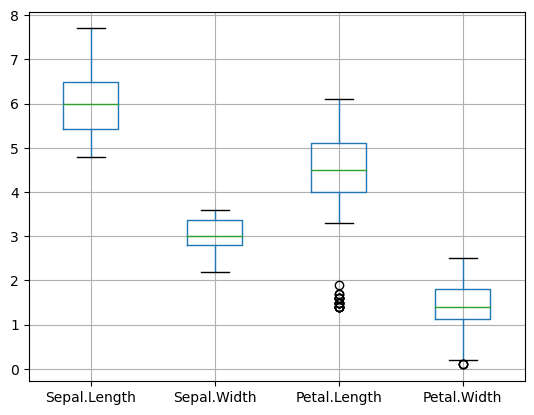

In [1278]:
data.boxplot()

<h1>Visualization of Data using Seaborn and Matplotlib</h1>

<Axes: >

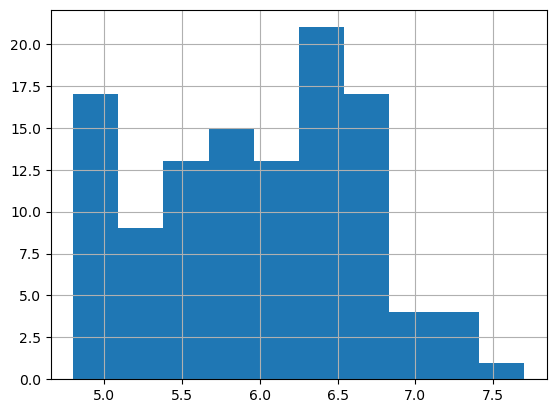

In [1280]:
data["Sepal.Length"].hist()

<Axes: >

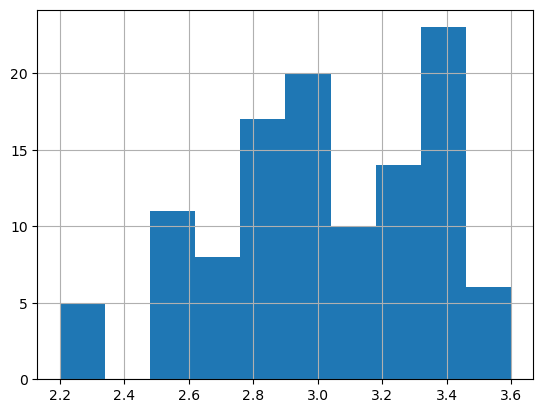

In [1281]:
data["Sepal.Width"].hist()

<Axes: >

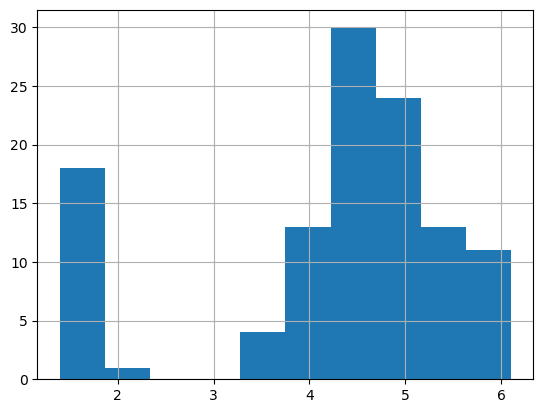

In [1282]:
data["Petal.Length"].hist()

<Axes: >

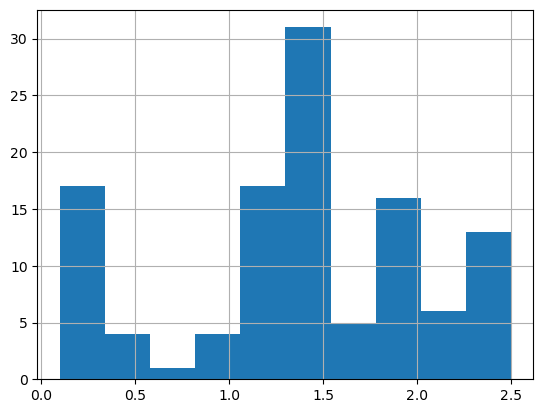

In [1283]:
data["Petal.Width"].hist()

In [1284]:
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.200000,4.500000,1.500000,versicolor
1,6.3,3.300000,6.000000,2.500000,virginica
2,6.2,3.390977,5.400000,2.300000,virginica
3,5.0,3.400000,1.600000,0.400000,setosa
4,5.7,2.600000,3.500000,1.000000,versicolor
...,...,...,...,...,...
145,6.7,3.100000,5.600000,2.400000,virginica
146,5.6,3.000000,4.500000,1.500000,versicolor
147,5.2,3.500000,1.500000,0.200000,setosa
148,6.4,3.100000,4.449962,1.800000,virginica


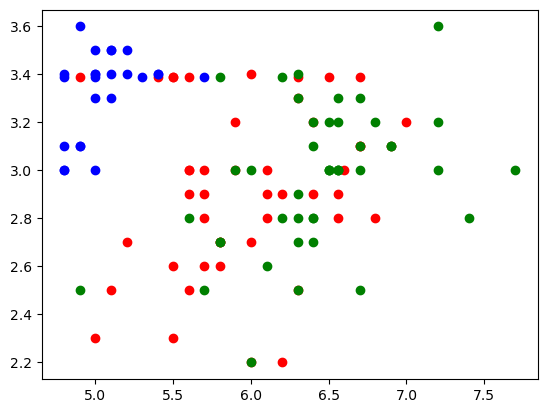

In [1285]:
x=data[data["Species"]=="versicolor"]
y=data[data["Species"]=="setosa"]
z=data[data["Species"]=="virginica"]
plt.scatter(x["Sepal.Length"],x["Sepal.Width"],color="red")
plt.scatter(y["Sepal.Length"],y["Sepal.Width"],color="blue")
plt.scatter(z["Sepal.Length"],z["Sepal.Width"],color="green")
plt.show()

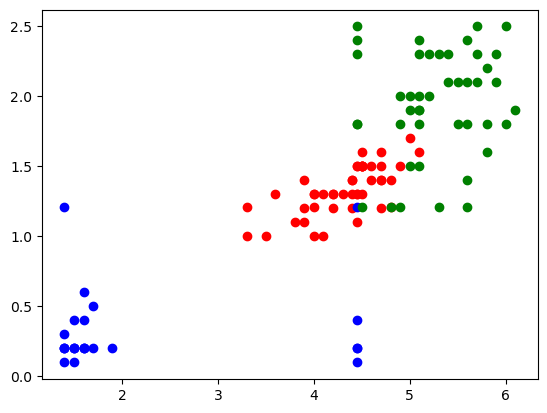

In [1286]:
x=data[data["Species"]=="versicolor"]
y=data[data["Species"]=="setosa"]
z=data[data["Species"]=="virginica"]
plt.scatter(x["Petal.Length"],x["Petal.Width"],color="red")
plt.scatter(y["Petal.Length"],y["Petal.Width"],color="blue")
plt.scatter(z["Petal.Length"],z["Petal.Width"],color="green")
plt.show()

<h1>Model Training</h1>

<h2>Holdout Method</h2>

In [1289]:
#splitting the data-set into training and test 
from sklearn.model_selection import train_test_split
x = data.drop(columns=['Species'])
y = data['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print("x_train length : ",x_train.shape[0])
print("y_train length : ",y_train.shape[0])
print("x_test length : ",x_test.shape[0])
print("y_test length : ",y_test.shape[0])

x_train length :  85
y_train length :  85
x_test length :  29
y_test length :  29


<h3>KNN Classifier</h3>

In [1291]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [1292]:
model_knn = KNeighborsClassifier()
model_knn

KNeighborsClassifier()

In [1293]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [1294]:
prediction_knn = model_knn.predict(x_test)
prediction_knn

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [1295]:
print("Accuracy on the Test Data ",end=" => ")
print(accuracy_score(y_test,prediction_knn))

Accuracy on the Test Data  => 0.896551724137931


In [1296]:
print("Classification Report on the Test Data ",end=" => \n")
print(classification_report(y_test,prediction_knn))

Classification Report on the Test Data  => 
              precision    recall  f1-score   support

      setosa       1.00      0.86      0.92         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.90      0.90        10

    accuracy                           0.90        29
   macro avg       0.92      0.89      0.90        29
weighted avg       0.90      0.90      0.90        29



In [1297]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,prediction)
cm_knn

array([[4, 2, 1],
       [4, 3, 5],
       [2, 6, 2]])

<Axes: >

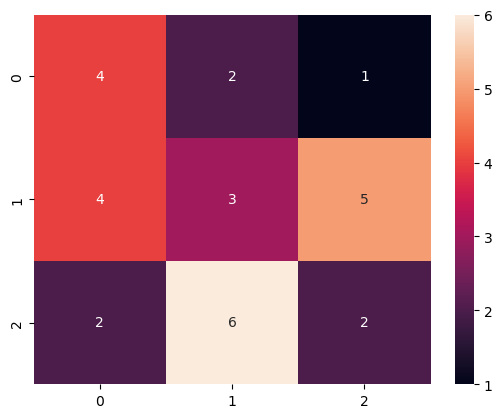

In [1298]:
sns.heatmap(cm_knn,annot=True)

<h3>Naive-Bayes Classifier</h3>

In [1300]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [1301]:
model_nb = GaussianNB()
model_nb

GaussianNB()

In [1302]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [1303]:
prediction_nb = model_nb.predict(x_test)
prediction_nb

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype='<U10')

In [1304]:
print("Accuracy Score on Test Data  => ",end=" ")
print(accuracy_score(y_test,prediction_nb))

print("\n\nClassification Report on the Test Data : ",end=" \n")
print(classification_report(y_test,prediction_nb))

Accuracy Score on Test Data  =>  0.9310344827586207


Classification Report on the Test Data :  
              precision    recall  f1-score   support

      setosa       1.00      0.86      0.92         7
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.90      0.95        10

    accuracy                           0.93        29
   macro avg       0.95      0.92      0.93        29
weighted avg       0.94      0.93      0.93        29



In [1305]:
cm_nb = confusion_matrix(y_test,prediction_nb)
cm_nb

array([[ 6,  1,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]])

<Axes: >

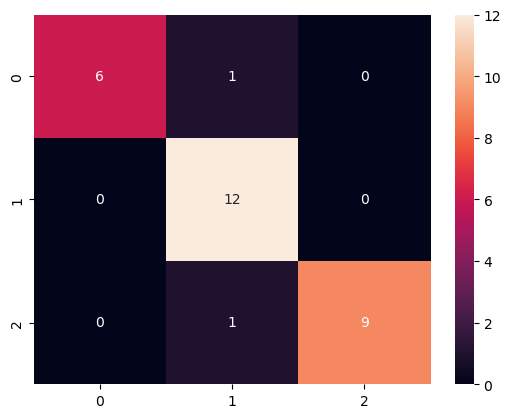

In [1306]:
sns.heatmap(cm_nb,annot=True)

<h3>Decision-Tree Classifier</h3>

In [1308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [1309]:
model_dt = DecisionTreeClassifier()
model_dt

DecisionTreeClassifier()

In [1310]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [1311]:
prediction_dt = model_dt.predict(x_test)
prediction_dt

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [1312]:
print("Accuracy Score on Test Data  => ",end=" ")
print(accuracy_score(y_test,prediction_dt))

print("\n\nClassification Report on the Test Data : ",end=" \n")
print(classification_report(y_test,prediction_dt))

Accuracy Score on Test Data  =>  0.8620689655172413


Classification Report on the Test Data :  
              precision    recall  f1-score   support

      setosa       1.00      0.86      0.92         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.90      0.86        10

    accuracy                           0.86        29
   macro avg       0.88      0.86      0.87        29
weighted avg       0.87      0.86      0.86        29



In [1313]:
cm_dt = confusion_matrix(y_test,prediction_dt)
cm_dt

array([[ 6,  1,  0],
       [ 0, 10,  2],
       [ 0,  1,  9]])

<Axes: >

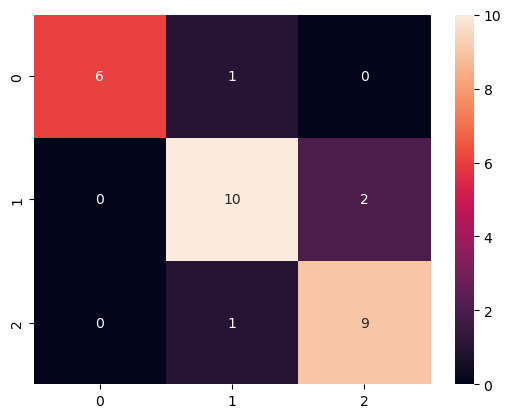

In [1314]:
sns.heatmap(cm_dt,annot=True)

<h3>Comparasion between all used Classifiers using graphical visualization</h3>

In [1]:
import matplotlib.pyplot as plt

<h2>Cross-validation Method</h2>

In [1316]:
from sklearn.model_selection import cross_val_score

x = data.drop(columns=['Species'])
y = data['Species']

<h3>KNN Classifier</h3>

In [1318]:
from sklearn.neighbors import KNeighborsClassifier

In [1319]:
model_knn = KNeighborsClassifier()
model_knn

KNeighborsClassifier()

In [1320]:
cv_scores_knn = cross_val_score(model_knn,x,y,cv=5)
cv_scores_knn

array([0.86956522, 0.91304348, 0.86956522, 0.86956522, 0.95454545])

In [1321]:
print("Mean Score for KNN Classifier : ",np.mean(cv_scores_knn))

Mean Score for KNN Classifier :  0.8952569169960473


<h3>Naive-Bayes Classifier</h3>

In [1323]:
from sklearn.naive_bayes import GaussianNB

In [1324]:
model_nb = GaussianNB()
model_nb

GaussianNB()

In [1325]:
cv_scores_nb = cross_val_score(model_nb,x,y,cv=5)
cv_scores_nb

array([0.91304348, 0.95652174, 0.86956522, 0.86956522, 1.        ])

In [1326]:
print("Mean Score for Naive-Bayes Classifier : ",np.mean(cv_scores_nb))

Mean Score for Naive-Bayes Classifier :  0.9217391304347824


<h3>Decision Tree Classifier</h3>

In [1328]:
from sklearn.tree import DecisionTreeClassifier 

In [1329]:
model_dt = DecisionTreeClassifier()
model_dt

DecisionTreeClassifier()

In [1330]:
cv_scores_dt = cross_val_score(model_dt,x,y,cv=5)
cv_scores_dt

array([0.91304348, 0.91304348, 0.7826087 , 0.7826087 , 1.        ])

In [1331]:
print("Mean Score for Decision Tree Classifier : ",np.mean(cv_scores_dt))

Mean Score for Decision Tree Classifier :  0.8782608695652174
